In the name of God

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the root directory and subfolders with filenames
root_dir = '/content/drive/My Drive/ADA'
subfolders = ['BeerAdvocate', 'RateBeer']
filenames = ['beers.csv', 'breweries.csv', 'users.csv']

# Dictionary to store DataFrames
data = {}

# Loop through each subfolder and filename to load data dynamically
for subfolder in subfolders:
    for filename in filenames:
        file_path = os.path.join(root_dir, subfolder, filename)
        # Create a descriptive key for each DataFrame
        key = f"{subfolder.lower()}_{filename.split('.')[0]}"

        if os.path.exists(file_path):
            data[key] = pd.read_csv(file_path)
        else:
            print(f"File {file_path} not found.")

# Load the user review summary file separately
user_review_summary = pd.read_csv(os.path.join(root_dir, 'Adding_nbr_reviews_userid_ratebeer.csv'))

print(data.keys())  # To see loaded DataFrame keys

dict_keys(['beeradvocate_beers', 'beeradvocate_breweries', 'beeradvocate_users', 'ratebeer_beers', 'ratebeer_breweries', 'ratebeer_users'])


In [4]:
# Dropping Duplicates in all csv files

data['ratebeer_users'] = data['ratebeer_users'].drop_duplicates(subset = 'user_id')
data['beeradvocate_users'] = data['beeradvocate_users'].drop_duplicates(subset = 'user_id')

data['ratebeer_beers'] = data['ratebeer_beers'].drop_duplicates(subset = 'beer_id')
data['beeradvocate_beers'] = data['beeradvocate_beers'].drop_duplicates(subset = 'beer_id')

data['ratebeer_breweries'] = data['ratebeer_breweries'].drop_duplicates(subset = 'id')
data['beeradvocate_breweries'] = data['beeradvocate_breweries'].drop_duplicates(subset = 'id')

user_review_summary = user_review_summary.drop_duplicates(subset = 'user_id')

In [5]:
data['ratebeer_users'] = data['ratebeer_users'].merge(
        user_review_summary[['user_id', 'nbr_reviews']], on='user_id', how='inner')

# Define the desired column order for data['ratebeer_users'] and data[beeradvocate_users]
new_order = ['user_id', 'user_name', 'nbr_ratings', 'nbr_reviews', 'joined', 'location']

# Reorder columns in data['ratebeer_users'] and data['beeradvocate_users']
data['ratebeer_users'] = data['ratebeer_users'][new_order]
data['beeradvocate_users'] = data['beeradvocate_users'][new_order]

# PreAnalysis for Users datasets

In [6]:
print(data['ratebeer_users'].dtypes)
print(data['beeradvocate_users'].dtypes)

user_id          int64
user_name       object
nbr_ratings      int64
nbr_reviews      int64
joined         float64
location        object
dtype: object
user_id         object
user_name       object
nbr_ratings      int64
nbr_reviews      int64
joined         float64
location        object
dtype: object


In [7]:
# Convert object type to string for columns which are necessery
data['ratebeer_users']['user_name'] = data['ratebeer_users']['user_name'].astype('string')
data['ratebeer_users']['location'] = data['ratebeer_users']['location'].astype('string')

data['beeradvocate_users']['user_id'] = data['beeradvocate_users']['user_id'].astype('string')
data['beeradvocate_users']['user_name'] = data['beeradvocate_users']['user_name'].astype('string')
data['beeradvocate_users']['location'] = data['beeradvocate_users']['location'].astype('string')

# Convert 'joined' column from Unix timestamp to datetime format
data['ratebeer_users']['joined'] = pd.to_datetime(data['ratebeer_users']['joined'], unit='s')
data['beeradvocate_users']['joined'] = pd.to_datetime(data['beeradvocate_users']['joined'], unit='s')

# Droping Nans in joined and location columns because we can't fill them!
data['ratebeer_users'] = data['ratebeer_users'].dropna(subset=['location', 'joined'])
data['beeradvocate_users'] = data['beeradvocate_users'].dropna(subset=['location', 'joined'])

# beeradvocate dataframe has one Nan in 'user_name' which we will fill it with its 'user_id'
data['beeradvocate_users']['user_name'] = data['beeradvocate_users']['user_name'].fillna(data['beeradvocate_users']['user_id'])

In [8]:
# Check for duplicates in 'beeradvocate_users' based on 'user_id'
duplicate_users_beeradvocate = data['beeradvocate_users'][data['beeradvocate_users'].duplicated(subset=['user_id'], keep=False)]

if not duplicate_users_beeradvocate.empty:
    print("Duplicate user_ids found in 'beeradvocate_users':")
    print(duplicate_users_beeradvocate)
else:
    print("No duplicate user_ids found in 'beeradvocate_users'.")

# Check for duplicates in 'ratebeer_users' based on 'user_id'
duplicate_users_ratebeer = data['ratebeer_users'][data['ratebeer_users'].duplicated(subset=['user_id'], keep=False)]

if not duplicate_users_ratebeer.empty:
    print("Duplicate user_ids found in 'ratebeer_users':")
    print(duplicate_users_ratebeer)
else:
    print("No duplicate user_ids found in 'ratebeer_users'.")

No duplicate user_ids found in 'beeradvocate_users'.
No duplicate user_ids found in 'ratebeer_users'.


In [9]:
data['ratebeer_users'].head(5)

,user_id,user_name,nbr_ratings,nbr_reviews,joined,location
0,175852,Manslow,1890,1612,2012-05-20 10:00:00,Poland
1,442761,MAGICuenca91,89,81,2017-01-10 11:00:00,Spain
2,288889,Sibarh,169,162,2013-11-16 11:00:00,Poland
3,250510,fombe89,3371,3056,2013-03-22 11:00:00,Spain
4,122778,kevnic2008,13043,11866,2011-02-02 11:00:00,Germany


In [11]:
data['beeradvocate_users'].head(5)

,user_id,user_name,nbr_ratings,nbr_reviews,joined,location
0,nmann08.184925,nmann08,7820,465,2008-01-07 11:00:00,"United States, Washington"
1,stjamesgate.163714,StJamesGate,2521,2504,2007-10-08 10:00:00,"United States, New York"
2,mdagnew.19527,mdagnew,1797,1143,2005-05-18 10:00:00,Northern Ireland
3,helloloser12345.10867,helloloser12345,31,31,2004-11-25 11:00:00,Northern Ireland
4,cypressbob.3708,cypressbob,604,604,2003-11-20 11:00:00,Northern Ireland


### Dataset Description

These two datasets contain user information from two beer rating and review platforms, RateBeer and BeerAdvocate. Below is an overview of the columns in these user data tables:

- **nbr_ratings**: The total number of ratings each user has given across various beers, reflecting their level of engagement with rating on the platform.

- **nbr_reviews**: The total number of detailed reviews a user has contributed, offering qualitative feedback on their beer experiences.

- **user_id**: A unique identifier for each user. In the BeerAdvocate dataset, `user_id` typically includes both the username and a numerical suffix to differentiate similar usernames. In the RateBeer dataset, `user_id` is usually represented as a standalone numerical code, unique to each user.

- **user_name**: The display name or alias chosen by the user, used for interaction within the platform.

- **joined**: The date and time when the user joined the platform.

- **location**: The user’s reported location, which often includes the country and, in some cases, the state or province. This can help in analyzing geographic trends in user activity or preferences.

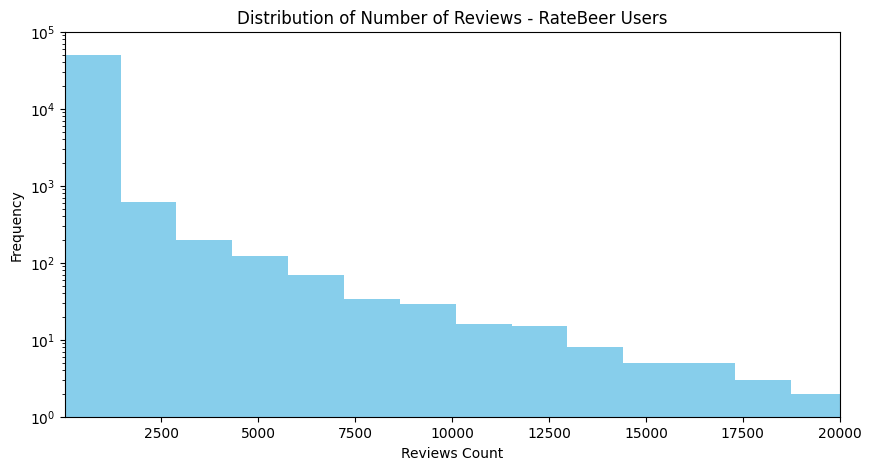

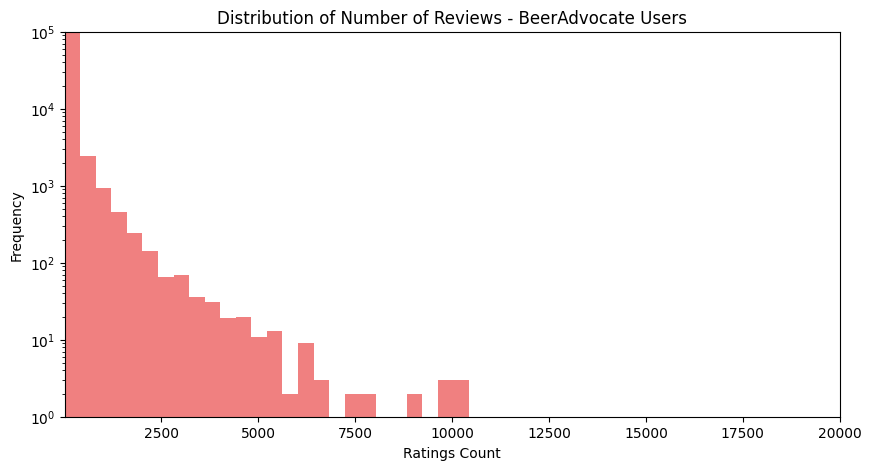

In [10]:
import matplotlib.pyplot as plt

# Plot distribution of nbr_reviews for RateBeer users with log scale
plt.figure(figsize=(10, 5))
plt.hist(data['ratebeer_users']['nbr_reviews'], bins=30, color='skyblue')  # Change color to skyblue
plt.title('Distribution of Number of Reviews - RateBeer Users')
plt.xlabel('Reviews Count')  # Change x-axis label
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(1, 20000)
plt.ylim(1, 100000)

plt.show()

# Plot distribution of nbr_reviews for BeerAdvocate users with log scale
plt.figure(figsize=(10, 5))
plt.hist(data['beeradvocate_users']['nbr_ratings'], bins=30, color='lightcoral')  # Change color to lightcoral
plt.title('Distribution of Number of Reviews - BeerAdvocate Users')
plt.xlabel('Ratings Count')  # Change x-axis label
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(1, 20000)
plt.ylim(1, 100000)
plt.show()

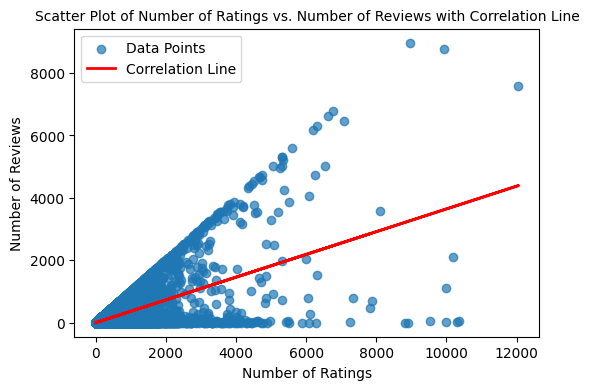

In [12]:
# Extract data for plotting
x = data['beeradvocate_users']['nbr_ratings']
y = data['beeradvocate_users']['nbr_reviews']
colors = data['beeradvocate_users']['location']

# Calculate the best-fit line (correlation line)
slope, intercept = np.polyfit(x, y, 1)  # 1 indicates a linear fit (first-degree polynomial)

# Plot the scatter plot and the correlation line
plt.figure(figsize = (6, 4))
plt.scatter(x, y, alpha = 0.7, label="Data Points")
plt.plot(x, slope * x + intercept, color = "red", linewidth = 2, label = "Correlation Line")

# Add labels and title
plt.xlabel("Number of Ratings", size = 10)
plt.ylabel("Number of Reviews", size = 10)
plt.title("Scatter Plot of Number of Ratings vs. Number of Reviews with Correlation Line", size = 10)
plt.legend()
plt.show()

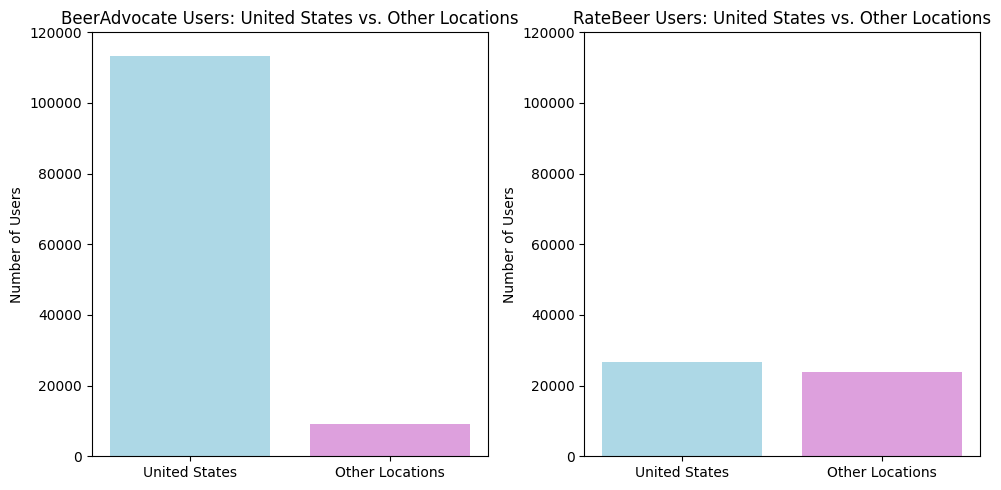

In [13]:
# Count the number of users from the United States for both datasets
beeradvocate_us_users_count = data['beeradvocate_users']['location'].str.contains('United States').sum()
ratebeer_us_users_count = data['ratebeer_users']['location'].str.contains('United States').sum()

# Count the number of users from other locations for both datasets
beeradvocate_other_users_count = len(data['beeradvocate_users']) - beeradvocate_us_users_count
ratebeer_other_users_count = len(data['ratebeer_users']) - ratebeer_us_users_count

plt.figure(figsize=(10, 5))

# Bar plot for BeerAdvocate users
plt.subplot(1, 2, 1)
plt.bar(['United States', 'Other Locations'], [beeradvocate_us_users_count, beeradvocate_other_users_count], color=['lightblue', 'plum'])
plt.title('BeerAdvocate Users: United States vs. Other Locations')
plt.ylabel('Number of Users')
plt.ylim(0, 120000)

# Bar plot for RateBeer users
plt.subplot(1, 2, 2)
plt.bar(['United States', 'Other Locations'], [ratebeer_us_users_count, ratebeer_other_users_count], color=['lightblue', 'plum'])
plt.title('RateBeer Users: United States vs. Other Locations')
plt.ylabel('Number of Users')
plt.ylim(0, 120000)
plt.tight_layout()
plt.show()

# PreAnalysis for breweries datasets

In [14]:
print(data['beeradvocate_breweries'].dtypes)
print(data['ratebeer_breweries'].dtypes)

id            int64
location     object
name         object
nbr_beers     int64
dtype: object
id            int64
location     object
name         object
nbr_beers     int64
dtype: object


In [15]:
# Convert object type to string
data['beeradvocate_breweries']['name'] = data['beeradvocate_breweries']['name'].astype('string')
data['beeradvocate_breweries']['location'] = data['beeradvocate_breweries']['location'].astype('string')

data['ratebeer_breweries']['name'] = data['ratebeer_breweries']['name'].astype('string')
data['ratebeer_breweries']['location'] = data['ratebeer_breweries']['location'].astype('string')

# Checking for Nan in both datasets
if data['ratebeer_breweries'].isnull().values.any():
  print("ratebeer_breweries has NaN values.")
else:
  print("ratebeer_breweries does not have NaN values.")

if data['beeradvocate_breweries'].isnull().values.any():
  print("beeradvocate_breweries has NaN values.")
else:
  print("beeradvocate_breweries does not have NaN values.")

ratebeer_breweries does not have NaN values.
beeradvocate_breweries does not have NaN values.


In [16]:
# Check for duplicates in 'beeradvocate_breweries' based on 'brewery_id'
duplicate_breweries_beeradvocate = data['beeradvocate_breweries'][data['beeradvocate_breweries'].duplicated(subset=['id'], keep=False)]

if not duplicate_breweries_beeradvocate.empty:
    print("Duplicate brewery_ids found in 'beeradvocate_breweries':")
    print(duplicate_breweries_beeradvocate)
else:
    print("No duplicate brewery_ids found in 'beeradvocate_breweries'.")

# Check for duplicates in 'ratebeer_breweries' based on 'brewery_id'
duplicate_breweries_ratebeer = data['ratebeer_breweries'][data['ratebeer_breweries'].duplicated(subset=['id'], keep=False)]

if not duplicate_breweries_ratebeer.empty:
    print("Duplicate brewery_ids found in 'ratebeer_breweries':")
    print(duplicate_breweries_ratebeer)
else:
    print("No duplicate brewery_ids found in 'ratebeer_breweries'.")

No duplicate brewery_ids found in 'beeradvocate_breweries'.
No duplicate brewery_ids found in 'ratebeer_breweries'.


In [17]:
data['beeradvocate_breweries'].head(5)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [18]:
data['ratebeer_breweries'].head(5)

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [19]:
data['beeradvocate_breweries'].sort_values(by='nbr_beers', ascending=False).head(10)

,id,location,name,nbr_beers
10691,2837,"United States, Pennsylvania",Rock Bottom Restaurant and Brewery,1196
14031,16083,"United States, Illinois",Rock Bottom Restaurant and Brewery,1196
15759,1099,"United States, Arizona",Rock Bottom Restaurant & Brewery,1196
10542,1100,"United States, Arizona",Rock Bottom Restaurant & Brewery - Arrowhead,1196
8106,2981,"United States, Wisconsin",Rock Bottom Restaurant & Brewery,1196
15564,16,"United States, Massachusetts",Rock Bottom Restaurant & Brewery,1196
10453,1137,"United States, Maryland",Rock Bottom Restaurant and Brewery,1196
14030,9620,"United States, Illinois",Rock Bottom Restaurant and Brewery,1196
13437,7066,"United States, Oregon",Rock Bottom Restaurant and Brewery,1196
16264,3059,"United States, Arizona",Rock Bottom Restaurant & Brewery - Desert Ridge,1196


In [20]:
data['ratebeer_breweries'].sort_values(by='nbr_beers', ascending=False).head(10)

,id,location,name,nbr_beers
12494,20106,Poland,Browar Wąsosz,295
14870,14248,"United States, Massachusetts",Night Shift Brewing,291
21426,2292,England,Rudgate,290
16961,13326,"United States, Missouri",Perennial Artisan Ales,290
13644,17792,"United States, California",Cellarmaker Brewing Company,289
21861,4443,England,Thornbridge,283
19411,489,"United States, Connecticut",Willimantic Brewing Company,283
18191,14870,"United States, Florida",Proof Brewing Company,282
13846,340,"United States, California",Karl Strauss Brewing Company,280
20942,3911,England,Brodies Beers,279


### Dataset Description: Breweries Data

These datasets contain information about breweries listed on two different beer rating platforms: BeerAdvocate and RateBeer.

- **id**: A unique identifier for each brewery. The ID is specific to each platform and used to distinguish individual breweries in the dataset.

- **location**: The geographic location of the brewery, typically specifying the country, and sometimes the region or state. This information provides insight into the distribution of breweries globally and may be used to explore regional brewing patterns or trends.

- **name**: The name of the brewery. This is the recognizable label associated with each brewery, often reflecting the brand or business name.

- **nbr_beers**: The number of unique beers produced by each brewery. This column offers insight into the scale or variety of production for each brewery, with higher values indicating a larger selection of beers.

# PreAnalysis for beers datasets

In [21]:
beer_reviews_summary = pd.read_csv('/content/drive/My Drive/ADA/Adding_nbr_reviews_beerid_ratebeer.csv')
data['ratebeer_beers'] = data['ratebeer_beers'].merge(beer_reviews_summary[['beer_id','nbr_reviews']], on = ['beer_id'], how = 'inner')

In [22]:
# List of columns to check for NaN values in beeradvocate
columns_to_check = ['ba_score', 'bros_score', 'zscore', 'avg_matched_valid_ratings']

# Iterate over each column in the list
for col in columns_to_check:
    if col in data['beeradvocate_beers'].columns:
        nan_percentage = (data['beeradvocate_beers'][col].isnull().sum() / len(data['beeradvocate_beers'])) * 100
        print(f"Percentage of NaN values in '{col}' column in beeradvocate_beers: {nan_percentage:.2f}%")
    else:
        print(f"Column '{col}' not found in beeradvocate_beers.")

if data['beeradvocate_beers']['nbr_matched_valid_ratings'].all() == 0:
  print("All values in 'nbr_matched_valid_ratings' are 0.")
else:
  print("Not all values in 'nbr_matched_valid_ratings' are 0.")

data['beeradvocate_beers'] = data['beeradvocate_beers'].drop(columns = columns_to_check)
data['beeradvocate_beers'] = data['beeradvocate_beers'].drop(columns = ['nbr_matched_valid_ratings','avg','avg_computed'])

Percentage of NaN values in 'ba_score' column in beeradvocate_beers: 78.21%
Percentage of NaN values in 'bros_score' column in beeradvocate_beers: 97.97%
Percentage of NaN values in 'zscore' column in beeradvocate_beers: 85.65%
Percentage of NaN values in 'avg_matched_valid_ratings' column in beeradvocate_beers: 89.93%
All values in 'nbr_matched_valid_ratings' are 0.


In [23]:
# Checking percentage os missing values in some columns in ratebeeer
columns_to_check = ['overall_score', 'style_score', 'zscore','avg_matched_valid_ratings']

for col in columns_to_check:
  if col in data['ratebeer_beers'].columns:
    nan_percentage = (data['ratebeer_beers'][col].isnull().sum() / len(data['ratebeer_beers'])) * 100
    print(f"Percentage of NaN values in '{col}' column in ratebeer_beers: {nan_percentage:.2f}%")
  else:
    print(f"Column '{col}' not found in ratebeer_beers.")

if data['ratebeer_beers']['nbr_matched_valid_ratings'].all() == 0:
  print("All values in 'nbr_matched_valid_ratings' are 0.")
else:
  print("Not all values in 'nbr_matched_valid_ratings' are 0.")

data['ratebeer_beers'] = data['ratebeer_beers'].drop(columns = columns_to_check)
data['ratebeer_beers'] = data['ratebeer_beers'].drop(columns = ['avg_computed','nbr_matched_valid_ratings','avg'])

Percentage of NaN values in 'overall_score' column in ratebeer_beers: 73.78%
Percentage of NaN values in 'style_score' column in ratebeer_beers: 73.77%
Percentage of NaN values in 'zscore' column in ratebeer_beers: 89.35%
Percentage of NaN values in 'avg_matched_valid_ratings' column in ratebeer_beers: 89.35%
All values in 'nbr_matched_valid_ratings' are 0.


In [33]:
nan_percentage_abv_ratebeer = (data['ratebeer_beers']['abv'].isnull().sum() / len(data['ratebeer_beers'])) * 100
print(f"Percentage of NaN values in 'abv' column in ratebeer_beers: {nan_percentage_abv_ratebeer:.2f}%")

Percentage of NaN values in 'abv' column in ratebeer_beers: 9.26%


In [35]:
nan_percentage_abv_beeradvocate = (data['beeradvocate_beers']['abv'].isnull().sum() / len(data['beeradvocate_beers'])) * 100
print(f"Percentage of NaN values in 'abv' column in beeradvocate_beers: {nan_percentage_abv_beeradvocate:.2f}%")

Percentage of NaN values in 'abv' column in beeradvocate_beers: 12.83%


In [29]:
data['beeradvocate_beers'].head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,abv
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,4.7
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,3.8
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,4.8
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,4.0
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,4.5


In [30]:
data['ratebeer_beers'].head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,abv,nbr_reviews
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,5.0,1
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.2,10
2,19445,Régab,3198,Sobraga,Pale Lager,27,4.5,27
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,4.6,6
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,4.2,1


### Dataset Description: Beers Data for BeerAdvocate and RateBeer

These datasets contain detailed information on individual beers from two platforms, BeerAdvocate and RateBeer.

#### Shared Columns
- **beer_id** and **beer_name**: Unique identifier and name of each beer.
- **brewery_id** and **brewery_name**: Identifier and name of the brewery that produces the beer.
- **style**: The type or category of the beer (e.g., IPA, Stout).
- **nbr_ratings** and **nbr_reviews**: Total user ratings and reviews the beer has received.
- **avg**: Average rating given by users.
- **abv**: Alcohol by volume percentage, representing the beer’s strength.


In [31]:
# Group by brewery name and count unique styles
brewery_style_counts = data['beeradvocate_beers'].groupby('brewery_name')['style'].nunique()

# Sort by style count in descending order and get the top 10
top_10_diverse_breweries = brewery_style_counts.sort_values(ascending=False).head(10)

print("Top 10 Most Diverse Breweries with Different Styles in BeerAdvocate:")
top_10_diverse_breweries

Top 10 Most Diverse Breweries with Different Styles in BeerAdvocate:


,style
brewery_name,
Iron Hill Brewery & Restaurant,90
Rock Bottom Restaurant & Brewery,89
Goose Island Beer Co.,85
John Harvard's Brewery & Ale House,84
Cigar City Brewing,81
Boston Beer Company (Samuel Adams),81
Short's Brewing Company,78
Sierra Nevada Brewing Co.,78
Sixpoint Brewery,77


In [32]:
# Group by brewery name and count unique styles
brewery_style_counts = data['ratebeer_beers'].groupby('brewery_name')['style'].nunique()

# Sort by style count in descending order and get the top 10
top_10_diverse_breweries = brewery_style_counts.sort_values(ascending=False).head(10)

print("Top 10 Most Diverse Breweries with Different Styles in RateBeer:")
top_10_diverse_breweries

Top 10 Most Diverse Breweries with Different Styles in RateBeer:


,style
brewery_name,
New Holland Brewing Company,64
Free State Brewing Company,63
Devils Backbone Brewing Company &#40;AB InBev&#41;,63
Beer Works,63
Midnight Sun Brewing Company,62
Bluegrass Brewing Company,62
Portsmouth Brewery,62
Le Cheval Blanc,62
Triumph Brewing Company,61
